In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [2]:
# path dataset
path = 'C:/Users/NAUFAL FAIZ/Documents/Forecasting Angka Kelahiran SDA/data/format/data_ahh_sidoarjo_formatted.csv'

# read dataset
df = pd.read_csv(path)
df.head()

,Tahun,Kota,Jenis_Kelamin,Jumlah
0,2010,Sidoarjo,Perempuan,70.76
1,2010,Sidoarjo,Laki-laki,70.79
2,2011,Sidoarjo,Perempuan,74.74
3,2011,Sidoarjo,Laki-laki,70.72
4,2012,Sidoarjo,Perempuan,74.67


In [3]:
# shape data
df.shape

(28, 4)

In [4]:
# info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tahun          28 non-null     int64  
 1   Kota           28 non-null     object 
 2   Jenis_Kelamin  28 non-null     object 
 3   Jumlah         28 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.0+ KB


In [5]:
# descriptive stats
df.describe(
    include='all'
).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Tahun,28.0,NaN,NaN,NaN,2017.035714,4.549987,2010.0,2013.0,2017.5,2021.0,2024.0
Kota,28,1,Sidoarjo,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jenis_Kelamin,28,2,Perempuan,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jumlah,28.0,NaN,NaN,NaN,73.569643,2.095794,70.72,71.8625,73.88,75.57,76.78


In [6]:
# separate to each gender
df_wanita = df[df['Jenis_Kelamin'] == 'Perempuan'].sort_values('Tahun').reset_index(drop=True)
df_pria = df[df['Jenis_Kelamin'] == 'Laki-laki'].sort_values('Tahun').reset_index(drop=True)

In [7]:
df_pria

,Tahun,Kota,Jenis_Kelamin,Jumlah
0,2010,Sidoarjo,Laki-laki,70.79
1,2011,Sidoarjo,Laki-laki,70.72
2,2012,Sidoarjo,Laki-laki,74.71
3,2013,Sidoarjo,Laki-laki,70.76
4,2014,Sidoarjo,Laki-laki,70.99
5,2015,Sidoarjo,Laki-laki,74.74
6,2017,Sidoarjo,Laki-laki,71.89
7,2018,Sidoarjo,Laki-laki,75.54
8,2019,Sidoarjo,Laki-laki,72.06
9,2020,Sidoarjo,Laki-laki,72.15


In [8]:
df_wanita

,Tahun,Kota,Jenis_Kelamin,Jumlah
0,2010,Sidoarjo,Perempuan,70.76
1,2011,Sidoarjo,Perempuan,74.74
2,2012,Sidoarjo,Perempuan,74.67
3,2013,Sidoarjo,Perempuan,70.79
4,2014,Sidoarjo,Perempuan,74.71
5,2015,Sidoarjo,Perempuan,74.94
6,2016,Sidoarjo,Perempuan,71.78
7,2018,Sidoarjo,Perempuan,75.66
8,2019,Sidoarjo,Perempuan,72.12
9,2020,Sidoarjo,Perempuan,75.79


In [9]:
# feature scaling
scaler_wanita = MinMaxScaler()
scaler_pria = MinMaxScaler()

scaled_wanita = scaler_wanita.fit_transform(df_wanita['Jumlah'].values.reshape(-1,1))
scaled_pria = scaler_pria.fit_transform(df_pria['Jumlah'].values.reshape(-1,1))

In [10]:
# create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 3

In [11]:
# apply to both datasets
X_wanita, y_wanita = create_sequences(scaled_wanita, seq_length)
X_pria, y_pria = create_sequences(scaled_pria, seq_length)

# reshape for LSTM
X_wanita = X_wanita.reshape((X_wanita.shape[0], X_wanita.shape[1], 1))
X_pria = X_pria.reshape((X_pria.shape[0], X_pria.shape[1], 1))

In [12]:
# modeling LSTM untuk Perempuan
model_wanita = Sequential([
    LSTM(150, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model_wanita.compile(optimizer='adam', loss='mse')

# modeling LSTM untuk Laki-laki
model_pria = Sequential([
    LSTM(150, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model_pria.compile(optimizer='adam', loss='mse')

In [13]:
# training model perempuan
history_wanita = model_wanita.fit(X_wanita, y_wanita, epochs=100, verbose=0, batch_size=2, validation_split=0.2)

In [14]:
# training model laki-laki
history_pria = model_pria.fit(X_pria, y_pria, epochs=100, verbose=0, batch_size=2, validation_split=0.2)

In [15]:
# model evaluate
print('Model Evaluate untuk Perempuan')
model_wanita.evaluate(X_wanita, y_wanita)

print('\nModel Evaluate untuk Laki-laki')
model_pria.evaluate(X_pria, y_pria)

Model Evaluate untuk Perempuan
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0441

Model Evaluate untuk Laki-laki
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0428


0.04281492903828621

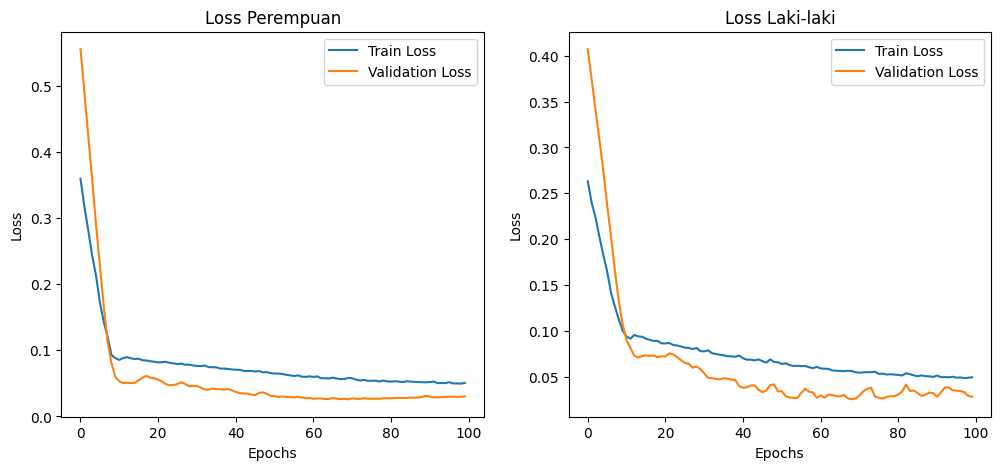

In [16]:
# plot loss training vs validation
plt.figure(figsize=(12,5))

# untul Perempuan
plt.subplot(1, 2, 1)
plt.plot(history_wanita.history['loss'], label='Train Loss')
plt.plot(history_wanita.history['val_loss'], label='Validation Loss')
plt.title('Loss Perempuan')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# untul Laki-laki
plt.subplot(1, 2, 2)
plt.plot(history_pria.history['loss'], label='Train Loss')
plt.plot(history_pria.history['val_loss'], label='Validation Loss')
plt.title('Loss Laki-laki')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [27]:
# save model
model_wanita.save('model_wanita.h5')
model_pria.save('model_pria.h5')

In [18]:
# forecasting untuk tahun 2025-2030
n_future = 6

# perempuan
last_seq_wanita = scaled_wanita[-seq_length:].reshape((1, seq_length, 1))
future_preds_wanita = []
for _ in range(n_future):
    pred = model_wanita.predict(last_seq_wanita, verbose=0)[0][0]
    future_preds_wanita.append(pred)
    last_seq_wanita = np.append(last_seq_wanita[:,1:,:], [[[pred]]], axis=1)
future_preds_wanita = scaler_wanita.inverse_transform(np.array(future_preds_wanita).reshape(-1,1)).flatten()

# laki-laki
last_seq_pria = scaled_pria[-seq_length:].reshape((1, seq_length, 1))
future_preds_pria = []
for _ in range(n_future):
    pred = model_pria.predict(last_seq_pria, verbose=0)[0][0]
    future_preds_pria.append(pred)
    last_seq_pria = np.append(last_seq_pria[:,1:,:], [[[pred]]], axis=1)
future_preds_pria = scaler_pria.inverse_transform(np.array(future_preds_pria).reshape(-1,1)).flatten()

In [19]:
# result
tahun_prediksi = list(range(2025, 2031))

print("\nPrediksi AHH Perempuan tahun 2025-2030:")
for tahun, pred in zip(tahun_prediksi, future_preds_wanita):
    print(f"Tahun {tahun}: {pred:.2f}")
print("\nPrediksi AHH Laki-laki tahun 2025-2030:")
for tahun, pred in zip(tahun_prediksi, future_preds_pria):
    print(f"Tahun {tahun}: {pred:.2f}")


Prediksi AHH Perempuan tahun 2025-2030:
Tahun 2025: 73.42
Tahun 2026: 78.69
Tahun 2027: 75.99
Tahun 2028: 75.70
Tahun 2029: 82.39
Tahun 2030: 74.49

Prediksi AHH Laki-laki tahun 2025-2030:
Tahun 2025: 70.68
Tahun 2026: 73.34
Tahun 2027: 75.71
Tahun 2028: 70.67
Tahun 2029: 73.45
Tahun 2030: 74.61


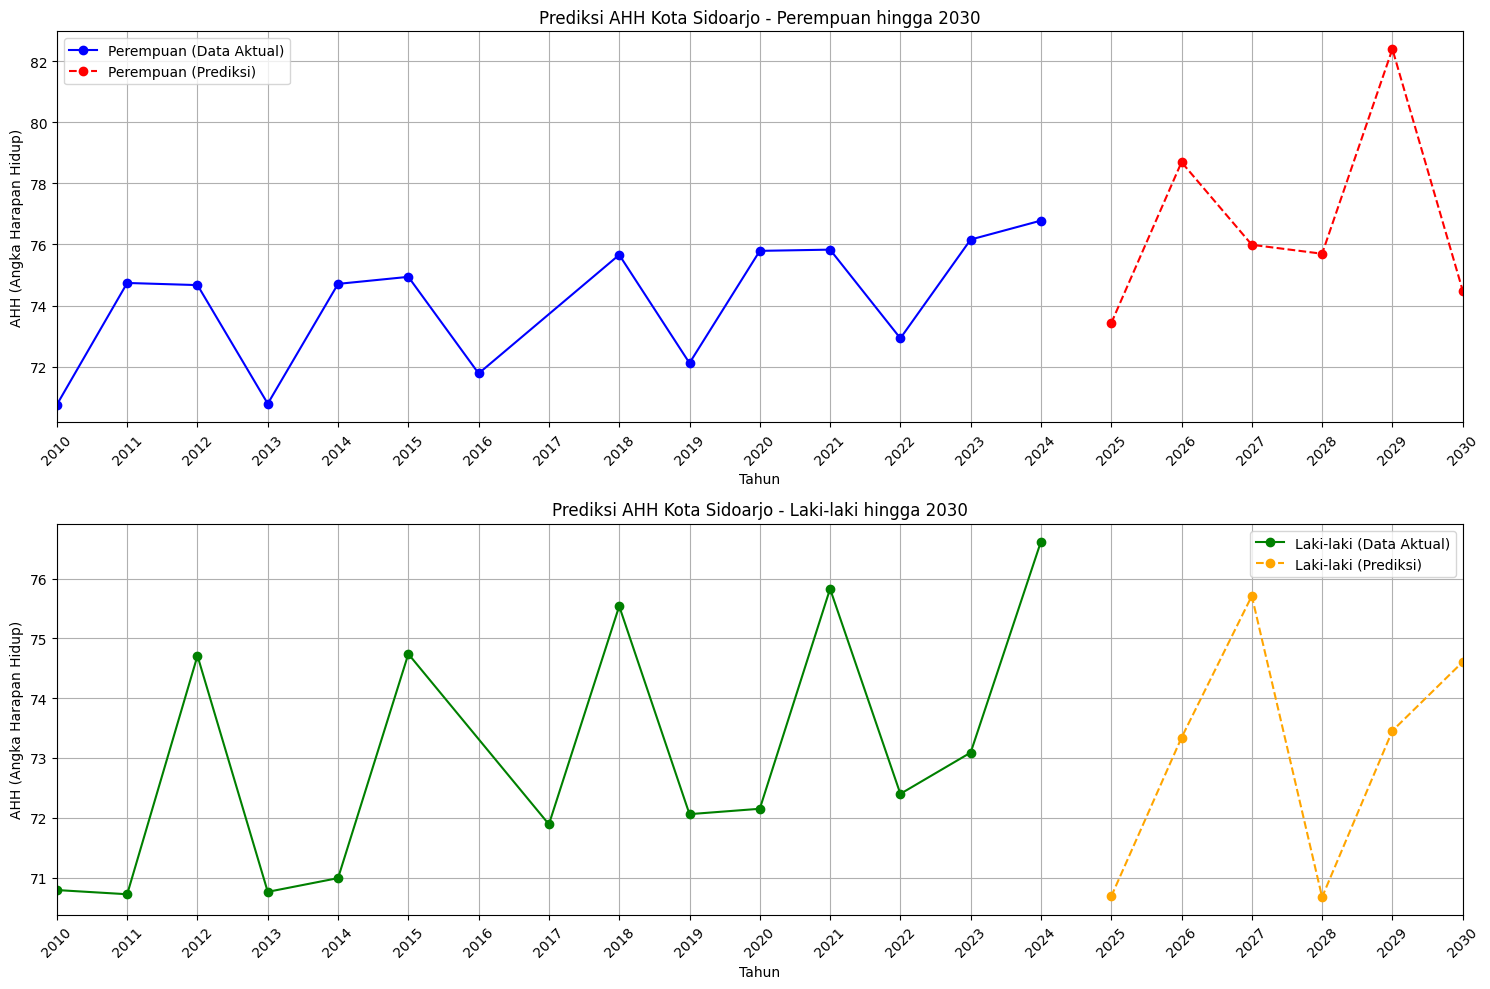

In [20]:
# visualisasi
plt.figure(figsize=(15, 10)) # Adjust figure size for better layout

# plot untuk Perempuan
plt.subplot(2, 1, 1)
plt.plot(df_wanita['Tahun'], df_wanita['Jumlah'], label='Perempuan (Data Aktual)', marker='o', linestyle='-', color='blue')
plt.plot(tahun_prediksi, future_preds_wanita, label='Perempuan (Prediksi)', marker='o', linestyle='--', color='red')
plt.title('Prediksi AHH Kota Sidoarjo - Perempuan hingga 2030')
plt.xlabel('Tahun')
plt.ylabel('AHH (Angka Harapan Hidup)')
plt.xlim(2010, 2030)
plt.xticks(range(2010, 2031, 1), rotation=45)
plt.legend()
plt.grid(True)

# plot untuk Laki-laki
plt.subplot(2, 1, 2)
plt.plot(df_pria['Tahun'], df_pria['Jumlah'], label='Laki-laki (Data Aktual)', marker='o', linestyle='-', color='green')
plt.plot(tahun_prediksi, future_preds_pria, label='Laki-laki (Prediksi)', marker='o', linestyle='--', color='orange')
plt.title('Prediksi AHH Kota Sidoarjo - Laki-laki hingga 2030')
plt.xlabel('Tahun')
plt.ylabel('AHH (Angka Harapan Hidup)')
plt.xlim(2010, 2030)
plt.xticks(range(2010, 2031, 1), rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()